In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Polos=100
data_fase1={"f":[4.003e3, 4.105e3, 4.107e3, 4.132e3], "RMS":[9.44, 15.8, 21.4, 4.72], "RMS_ciclo":[9.48, 15.8, 21.4, 4.68],"R_L":[106.9,199.3,300.1,50.0]}
data_fase2={"f":[3.99e3, 4.136e3, 4.122e3, 4.119e3], "RMS":[7.55, 12.6, 17.1, 3.73], "RMS_ciclo":[7.55, 12.7, 17.2, 3.76],"R_L":[107.5,199.0,301.0,50.3]}

fase1=pd.DataFrame(data_fase1)
fase2=pd.DataFrame(data_fase2)
fase1 = fase1.sort_values(by="R_L")
fase2 = fase2.sort_values(by="R_L")

fase1["P_L"]=fase1["RMS"]**2/fase1["R_L"]
fase2["P_L"]=fase2["RMS"]**2/fase2["R_L"]
fase1["RPM"]=fase1["f"]*120/(2*Polos)
fase2["RPM"]=fase2["f"]*120/(2*Polos)

#Variables independientes
#rpm=np.linspace(500,5000,200)
R_carga=np.logspace(0,3,200)
#(RPM,R_L)=np.meshgrid(rpm,R_carga)
RPM = 2400
R_L = R_carga
RPM=5880 #Velocidad del motor constante

# Lo que esta aca abajo conviertelo en una funcion que tenga como argumentos RPM y R_L
#

#datos electricos para stepper grande

Polos=100 #Numero de polos
K=8/(1300*np.pi/30) #Constante de motor [V*s] [N*m/A]
print(K)

#frecuencias probadas en puente de impedancias
f_prueba=np.array([500, 1000, 5000, 10000])

#Resistencias internas medidas
R_i_1=np.array([9.5, 17.03, 118.5, 298]) #[Ohm]
R_i_2=np.array([10.15, 17.85, 119.4, 299]) #[Ohm]
R_i=(R_i_1+R_i_2)/2

#Inductancias internas medidas
L_i_1=np.array([16.824, 17.053, 14.384, 12.441])*1e-3 #[H]
L_i_2=np.array([17.609, 17.197, 14.297, 12.366])*1e-3 #[H]
L_i=(L_i_1+L_i_2)/2
L_ilog=np.log10(L_i)
f_pruebalog=np.log10(f_prueba)

#Ajuste para resistencia interna en función de la frecuencia
Poly_f_R=np.polyfit(f_prueba,R_i,2)
R_poly=lambda f: np.polyval(Poly_f_R,f)

#Ajuste para inductancia interna en función de la frecuencia
Poly_f_L=np.polyfit(f_pruebalog,L_ilog,2)
L_poly=lambda f: 10**np.polyval(Poly_f_L,np.log10(f))


#Estas variables son las qeu debe devolver la funcion si se puede en un pandas seria interesante, si no no hay lio
#Revisa bien este pedazo porfa
f_rp=2*Polos*RPM/120 #frecuencia electrica
omega=2*np.pi*f_rp/60 #Vel angular eje
omega_e=omega*Polos/2 #omega electrica
X_tot=R_L+R_poly(f_rp)+omega_e*L_poly(f_rp)*1j #Impedancia total
X_L=R_L #Impedancia de carga
E_A=K*np.pi*f_rp/30 #Fuente ideal interna (creo acá está mal deberia ser omega del eje)
S_tot=np.abs(E_A)**2/np.conj(X_tot) #Potencia total entregada
V_L=E_A*X_L/X_tot #Voltaje en la carga
S_L=np.abs(V_L)**2/np.conj(X_L) #Potencia en la carga por fase
FP=np.cos(np.angle(S_tot)) #Factor de potencia
I_A=E_A/X_tot #Corriente de fase
T_motor=np.abs(I_A)*FP*K #Torque de motor
P_in=2*omega*T_motor #Potencia de entrada
#n_tot=2*np.real(S_tot)/P_in
n_L=2*np.real(S_L)/P_in


0.058764902064699816


In [ ]:
print(E_A)
print(R_L)

60.3076923076923
[   1.            1.03532184    1.07189132    1.1097525     1.148951
    1.18953407    1.2315506     1.27505124    1.3200884     1.36671636
    1.4149913     1.4649714     1.51671689    1.57029012    1.62575567
    1.68318035    1.74263339    1.80418641    1.8679136     1.93389175
    2.00220037    2.07292178    2.1461412     2.22194686    2.30043012
    2.38168555    2.46581108    2.55290807    2.64308149    2.73644
    2.8330961     2.93316628    3.03677112    3.14403547    3.2550886
    3.37006433    3.48910121    3.6123427     3.7399373     3.87203878
    4.00880633    4.15040476    4.2970047     4.44878283    4.60592204
    4.7686117     4.93704785    5.11143348    5.29197874    5.47890118
    5.67242607    5.87278661    6.08022426    6.29498899    6.5173396
    6.74754405    6.98587975    7.2326339     7.48810386    7.75259749
    8.02643352    8.30994195    8.60346442    8.90735464    9.22197882
    9.54771611    9.88495905   10.23411402   10.59560179   10.96985

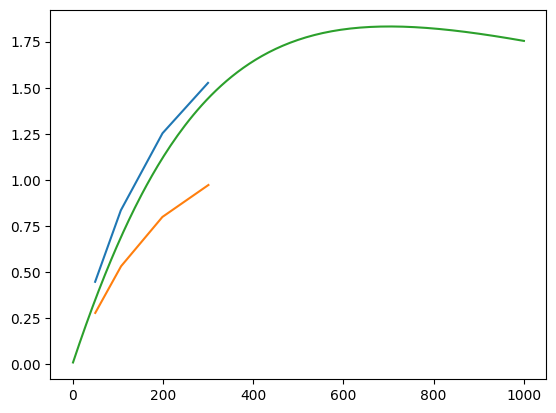

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


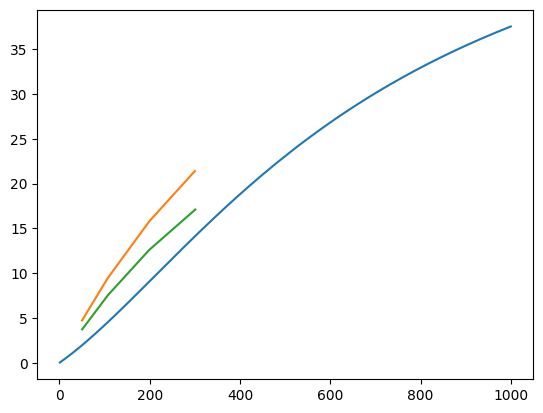

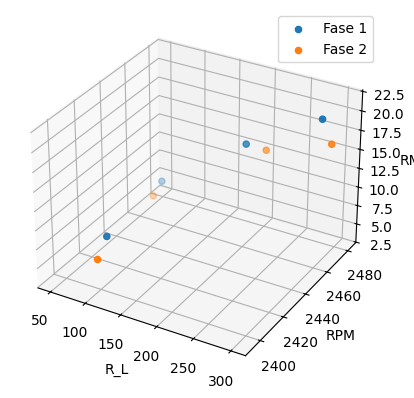

In [ ]:
plt.plot(fase1["R_L"],fase1["P_L"],label="Fase 1")
plt.plot(fase2["R_L"],fase2["P_L"],label="Fase 2")
plt.plot(R_L,S_L)
plt.show()

plt.plot(R_L,V_L)
#plt.plot(R_L,E_A)
plt.plot(fase1["R_L"],fase1["RMS"],label="Fase 1")
plt.plot(fase2["R_L"],fase2["RMS"],label="Fase 2")
plt.show()


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(fase1["R_L"], fase1["RPM"], fase1["RMS"], label="Fase 1")
ax.scatter(fase2["R_L"], fase2["RPM"], fase2["RMS"], label="Fase 2")

ax.set_xlabel('R_L')
ax.set_ylabel('RPM')
ax.set_zlabel('RMS')
plt.legend()
plt.show()


60.3076923076923
36.6
46.23


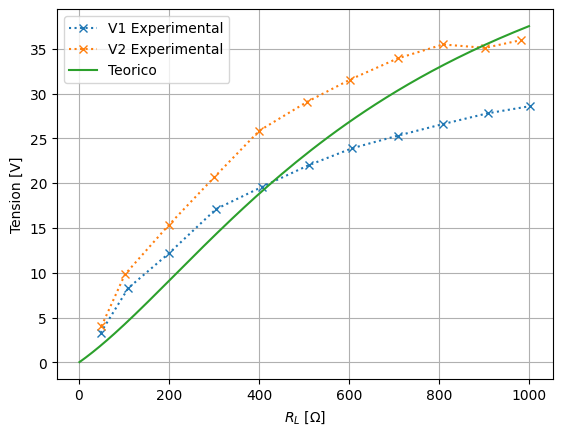

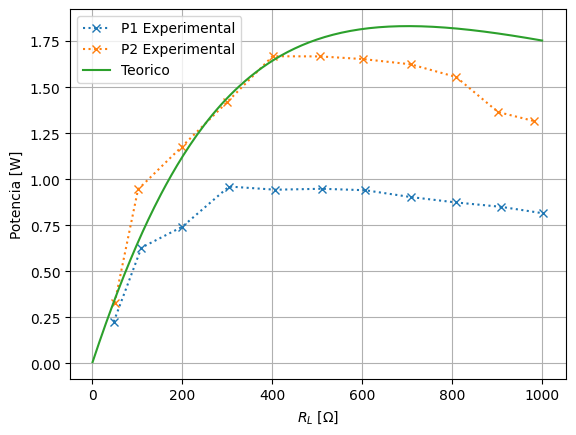

In [ ]:
data_experimento = {
    "Frecuencia_Hz": [4113, 4126, 4110, 4115, 4197, 4171, 4169, 4170, 4155, 4165, 4165, 4172],
    "R2_Experimental": [50, 102, 199.1, 300.8, 401, 507, 602, 708, 809, 902, 982, np.inf],
    "R1_Experimental": [48, 109.5, 200.4, 304.2, 407, 510, 607, 708, 809, 908, 1003, np.inf],
    "Resistencia": [50, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, np.inf],
    "Voltaje_V1": [3.3, 8.3, 12.2, 17.1, 19.6, 22, 23.9, 25.3, 26.6, 27.8, 28.6, 36.6],
    "Voltaje_V2": [4.049, 9.82, 15.31, 20.68, 25.87, 29.08, 31.55, 33.92, 35.48, 35.1, 35.96, 46.23],
    "Peso_g": [np.nan]*12,  # Como no reportaste pesos, los dejamos como NaN
    "P1": [0.226875, 0.62913242, 0.742714571, 0.961242604, 0.943882064, 0.949019608, 0.941037891, 0.904081921, 0.87461063, 0.851145374, 0.81551346, 0],
    "P2": [0.32788802, 0.945415686, 1.177278252, 1.42175, 1.668969825, 1.667941617, 1.653492525, 1.625093785, 1.556032633, 1.365864745, 1.31682444, 0]
}
# Crear el DataFrame
df_experimento = pd.DataFrame(data_experimento)
print(E_A)
print(df_experimento['Voltaje_V1'][11])
print(df_experimento['Voltaje_V2'][11])


plt.plot(df_experimento["R1_Experimental"][:-1], df_experimento["Voltaje_V1"][:-1],":x",label="V1 Experimental")
plt.plot(df_experimento["R2_Experimental"][:-1], df_experimento["Voltaje_V2"][:-1],":x",label="V2 Experimental")
plt.plot(R_L,V_L,label="Teorico")
plt.xlabel(r"$R_L$ [$\Omega$]")
plt.ylabel("Tension [V]")
plt.grid()
plt.legend()
plt.show()

plt.plot(df_experimento["R1_Experimental"][:-1], df_experimento["P1"][:-1],":x",label="P1 Experimental")
plt.plot(df_experimento["R2_Experimental"][:-1], df_experimento["P2"][:-1],":x",label="P2 Experimental")
plt.plot(R_L,S_L,label="Teorico")
plt.xlabel(r"$R_L$ [$\Omega$]")
plt.ylabel("Potencia [W]")
plt.grid()
plt.legend()
plt.show()

In [ ]:
# Datos de Prueba 1 extraídos de la imagen
data_prueba_1 = {
    "Hz": [4943, 4903, 4879, 4858, 4845, 4838, 4835, 4835, 4835, 4839],
    "V1": [8.66, 15.7, 21.7, 26.8, 30.8, 33.9, 36.5, 38.7, 40.5, 42.2],
    "V2": [7.64, 14.1, 19.1, 23.5, 26.9, 29.7, 32, 33.9, 35.5, 36.9],
    "Peso (g)": [4.6, 10.4, 12.8, 14.7, 16.5, 18, 17.4, 17.6, 17.6, 17.4]
}
# Datos de Prueba 2
data_prueba_2 = {
    "Hz": [4975, 4931, 4897, 4875, 4681, 4852, 4846, 4844, 4842, 4842],
    "V1": [8.24, 15.7, 21.7, 26.6, 30.6, 33.8, 36.5, 38.6, 40.4, 42],
    "V2": [7.29, 13.8, 19.1, 23.4, 26.9, 29.6, 32, 33.9, 35.4, 36.7],
    "Peso (g)": [5.3, 9.1, 11.8, 14.3, 15.1, 16.4, 16.8, 17.2, 17.2, 17.4]
}

# Datos de Prueba 3
data_prueba_3 = {
    "Hz": [4977, 4932, 4900, 4878, 4863, 4852, 4848, 4846, 4885, 4845],
    "V1": [8.24, 15.8, 21.6, 26.5, 30.5, 33.8, 36.5, 38.6, 40.4, 42.6],
    "V2": [7.25, 13.7, 19.1, 23.3, 26.8, 29.7, 32, 33.9, 35.9, 36.8],
    "Peso (g)": [5.1, 9, 12, 14.1, 15.6, 16.8, 17, 17.3, 17.4, 18.3]
}

# Crear los DataFrames
df_prueba_1 = pd.DataFrame(data_prueba_1)
df_prueba_2 = pd.DataFrame(data_prueba_2)
df_prueba_3 = pd.DataFrame(data_prueba_3)
valores_R1 = [98, 199, 297, 396, 495, 594, 693, 792, 892, 990]
valores_R2 = [101, 199, 298, 397, 496, 595, 694, 794, 893, 992]
# Agregar las columnas "R1" y "R2" al DataFrame
df_prueba_1["R1"] = valores_R1
df_prueba_1["R2"] = valores_R2
df_prueba_2["R1"] = valores_R1
df_prueba_2["R2"] = valores_R2
df_prueba_3["R1"] = valores_R1
df_prueba_3["R2"] = valores_R2
# Calcular el promedio fila a fila entre los tres DataFrames
df_promedio = (df_prueba_1 + df_prueba_2 + df_prueba_3) / 3

df_total = pd.concat([df_prueba_1, df_prueba_2, df_prueba_3], ignore_index=True)
# Calcular la desviación estándar fila a fila
df_desviacion = pd.DataFrame({
    "Hz": df_total.groupby(df_total.index % 10)["Hz"].std().values,
    "V1": df_total.groupby(df_total.index % 10)["V1"].std().values,
    "V2": df_total.groupby(df_total.index % 10)["V2"].std().values,
    "R1": df_total.groupby(df_total.index % 10)["R1"].std().values,
    "R2": df_total.groupby(df_total.index % 10)["R2"].std().values,
    "Peso (g)": df_total.groupby(df_total.index % 10)["Peso (g)"].std().values
})

df_promedio["P1"]=df_promedio["V1"]**2/df_promedio["R1"]
df_promedio["P2"]=df_promedio["V2"]**2/df_promedio["R2"]
df_promedio["T"]=df_promedio["Peso (g)"]*9.81*95e-3*1e-3
df_promedio["P_in"]=2*np.pi*df_promedio["Hz"]*df_promedio["T"]*(1/Polos)
df_promedio["n"]=df_promedio["P1"]+df_promedio["P2"]
df_promedio["n"]=df_promedio["n"]/df_promedio["P_in"]

print(df_promedio)
print(df_desviacion)


            Hz         V1         V2   Peso (g)     R1     R2        P1  \
0  4965.000000   8.380000   7.393333   5.000000   98.0  101.0  0.716576   
1  4922.000000  15.733333  13.866667   9.500000  199.0  199.0  1.243908   
2  4892.000000  21.666667  19.100000  12.200000  297.0  298.0  1.580621   
3  4870.333333  26.633333  23.400000  14.366667  396.0  397.0  1.791249   
4  4796.333333  30.633333  26.866667  15.733333  495.0  496.0  1.895760   
5  4847.333333  33.833333  29.666667  17.066667  594.0  595.0  1.927095   
6  4843.000000  36.500000  32.000000  17.066667  693.0  694.0  1.922439   
7  4841.666667  38.633333  33.900000  17.366667  792.0  794.0  1.884513   
8  4854.000000  40.433333  35.600000  17.400000  892.0  893.0  1.832796   
9  4842.000000  42.266667  36.800000  17.700000  990.0  992.0  1.804516   

         P2         T      P_in         n  
0  0.541202  0.004660  1.453656  0.865251  
1  0.966253  0.008854  2.738027  0.807210  
2  1.224195  0.011370  3.494771  0.802575 

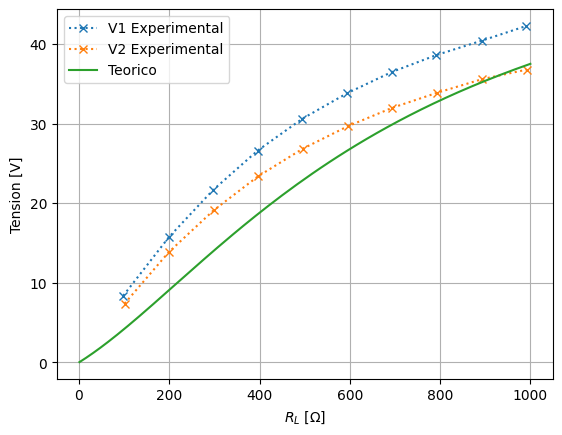

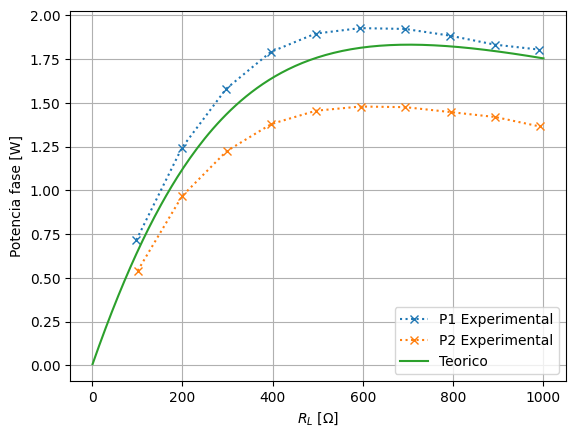

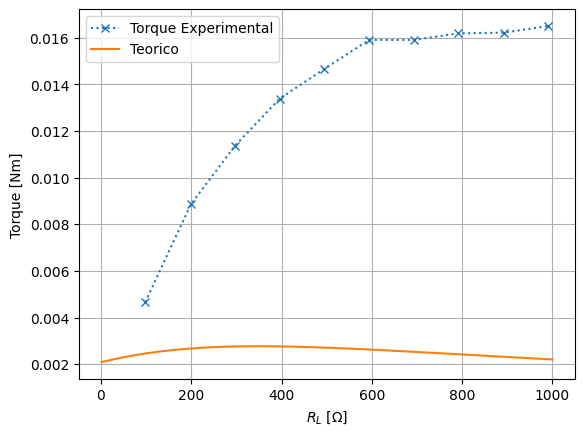

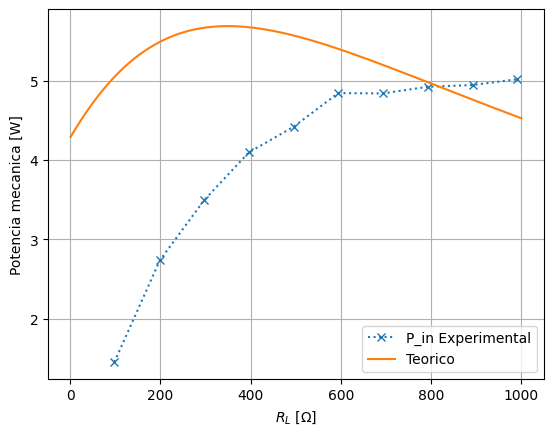

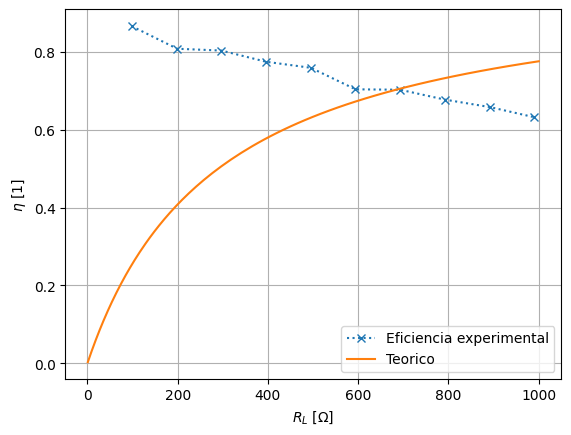

In [ ]:
plt.plot(df_promedio["R1"], df_promedio["V1"],":x",label="V1 Experimental")
plt.plot(df_promedio["R2"], df_promedio["V2"],":x",label="V2 Experimental")
plt.plot(R_L,V_L,label="Teorico")
plt.xlabel(r"$R_L$ [$\Omega$]")
plt.ylabel("Tension [V]")
plt.grid()
plt.legend()
plt.show()

plt.plot(df_promedio["R1"], df_promedio["P1"],":x",label="P1 Experimental")
plt.plot(df_promedio["R2"], df_promedio["P2"],":x",label="P2 Experimental")
plt.plot(R_L,S_L,label="Teorico")
plt.xlabel(r"$R_L$ [$\Omega$]")
plt.ylabel("Potencia fase [W]")
plt.grid()
plt.legend()
plt.show()

plt.plot(df_promedio["R1"], df_promedio["T"],":x",label="Torque Experimental")
plt.plot(R_L,T_motor,label="Teorico")
plt.xlabel(r"$R_L$ [$\Omega$]")
plt.ylabel("Torque [Nm]")
plt.grid()
plt.legend()
plt.show()

plt.plot(df_promedio["R1"], df_promedio["P_in"],":x",label="P_in Experimental")
plt.plot(R_L,P_in,label="Teorico")
plt.xlabel(r"$R_L$ [$\Omega$]")
plt.ylabel("Potencia mecanica [W]")
plt.grid()
plt.legend()
plt.show()

plt.plot(df_promedio["R1"], df_promedio["n"],":x",label="Eficiencia experimental")
plt.plot(R_L,n_L,label="Teorico")
plt.xlabel(r"$R_L$ [$\Omega$]")
plt.ylabel("$\eta$ [1]")
plt.grid()
plt.legend()
plt.show()